In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Zadanie 2

In [148]:
df = pd.read_csv('product.csv', index_col=0)

In [149]:
x = df['x']
y = df['y']
ransac = RANSACRegressor(LinearRegression())

ransac.fit(df['x'].values.reshape(-1,1), df['y'].values.reshape(-1,1))
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

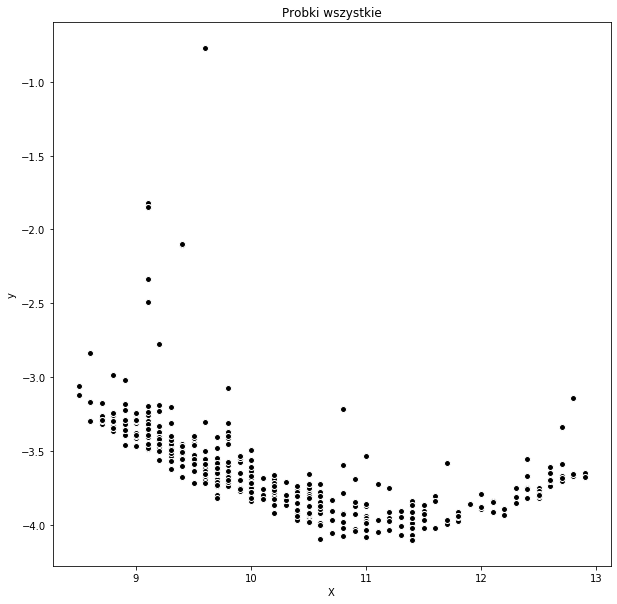

In [150]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'],
            color='black', edgecolor='white', 
            marker='o')
plt.title('Probki wszystkie')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

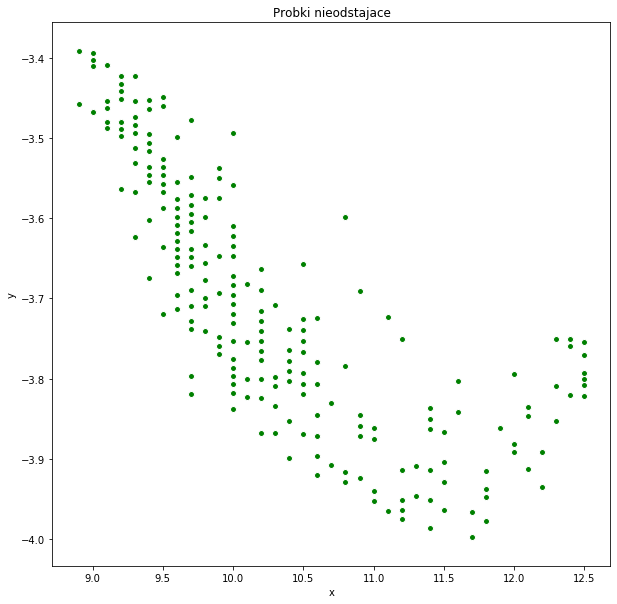

In [151]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'][inlier_mask], df['y'][inlier_mask],
            color='green', edgecolor='white', 
            marker='o')
plt.title('Probki nieodstajace')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

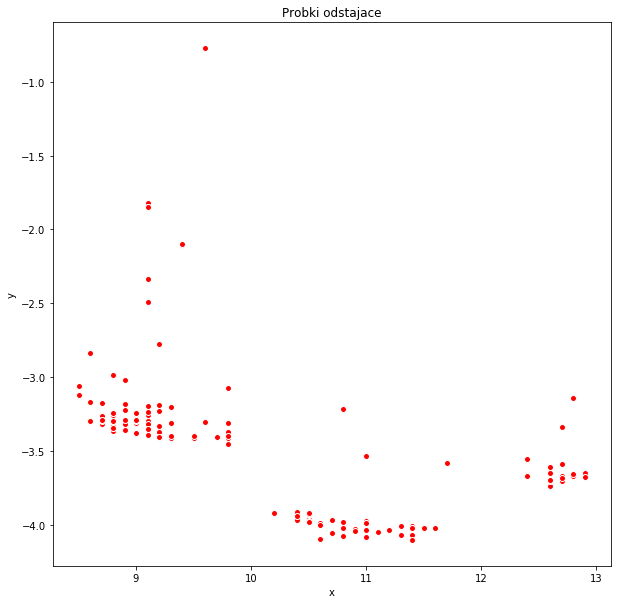

In [152]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(df['x'][outlier_mask], df['y'][outlier_mask],
            color='red', edgecolor='white', 
            marker='o')
plt.title('Probki odstajace')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [153]:
df = df[inlier_mask]
x_train, x_test, y_train, y_test = train_test_split(df['x'],df['y'], test_size=0.3, random_state=25)


ransac.fit(df['x'].values.reshape(-1,1), df['y'])
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Zbiór testowy

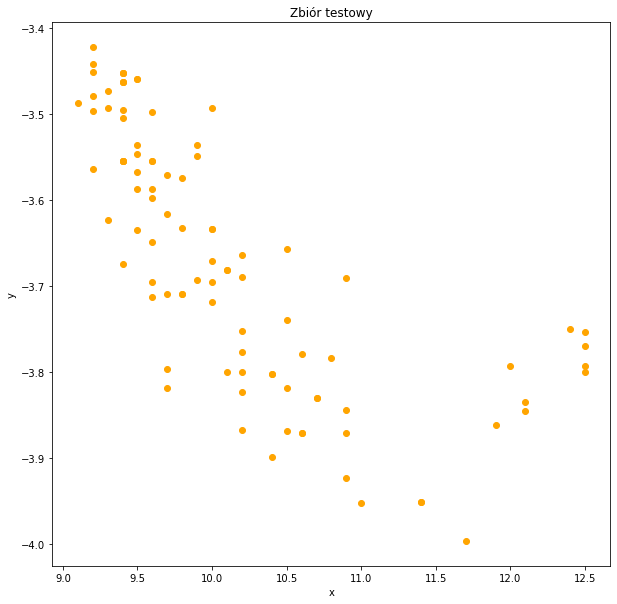

In [154]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1), 'o', color="orange")
plt.title('Zbiór testowy')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Zbiór treningowy

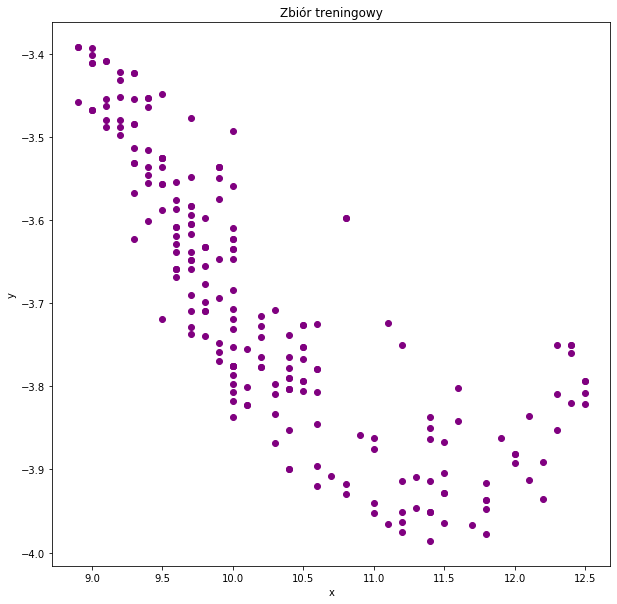

In [155]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1), 'o', color="purple")
plt.title('Zbiór treningowy')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Regresja liniowa

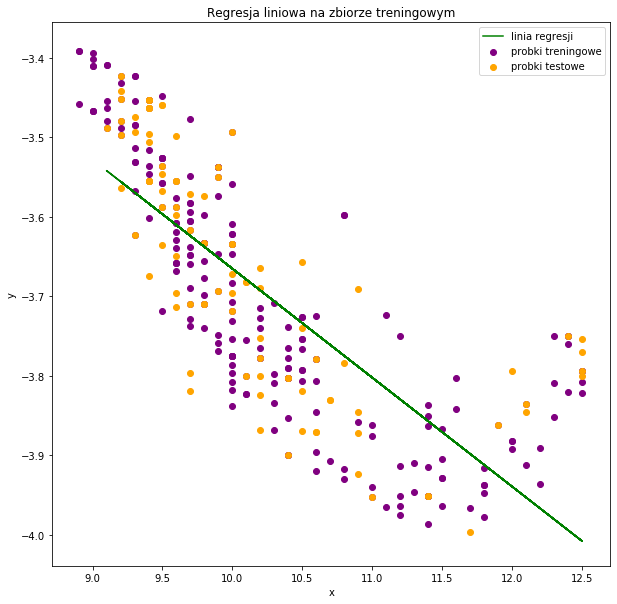

In [156]:
X_train = x_train.values.reshape(-1,1)
Y_train = y_train.values.reshape(-1,1)

X_test = x_test.values.reshape(-1,1)
Y_test = y_test.values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train,Y_train)

y_pred = linear_regressor.predict(X_test)

fig = plt.figure(figsize=(10, 10))
plt.title('Regresja liniowa na zbiorze treningowym')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train,Y_train, color='purple', label='probki treningowe')
plt.scatter(X_test,Y_test, color='orange', label='probki testowe')
plt.plot(X_test, y_pred, color='green', label='linia regresji')
plt.legend()
plt.show()

# MSE i R^2

In [157]:
mse_test = mean_squared_error(X_test, y_pred)
print('MSE dla zbioru testowego = ', mse_test)

rsquare_test = r2_score(Y_test, y_pred)
print('R^2 dla zbioru testowego = ', rsquare_test)

MSE dla zbioru testowego =  192.18068501812863
R^2 dla zbioru testowego =  0.5147526984581747


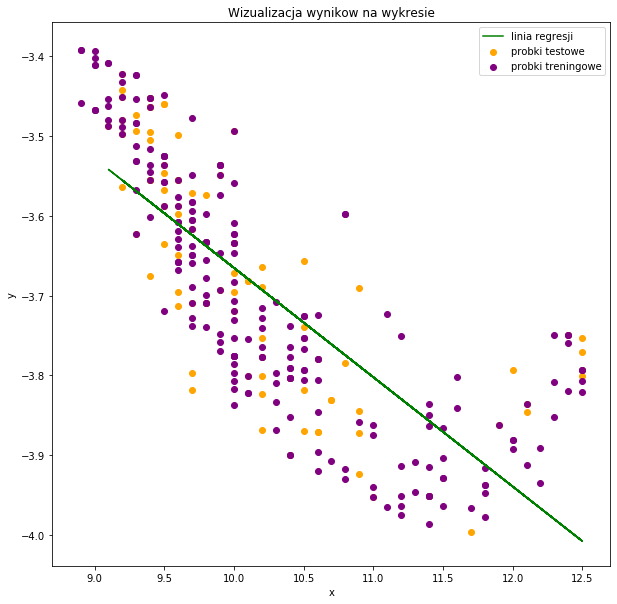

Wzor wynosi:
y = -0.1371 x -2.2939


In [158]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_test,Y_test, color='orange', label='probki testowe')
plt.scatter(X_train,Y_train, color='purple', label='probki treningowe')
plt.plot(X_test, y_pred, color='green', label='linia regresji')

a = round((linear_regressor.coef_[0][0]),4)
b = round((linear_regressor.intercept_[0]),4)

plt.title('Wizualizacja wynikow na wykresie')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print ('Wzor wynosi:\ny =',a,'x',b)

# Zadanie 3

# Regresja wielomianowa drugiego stopnia

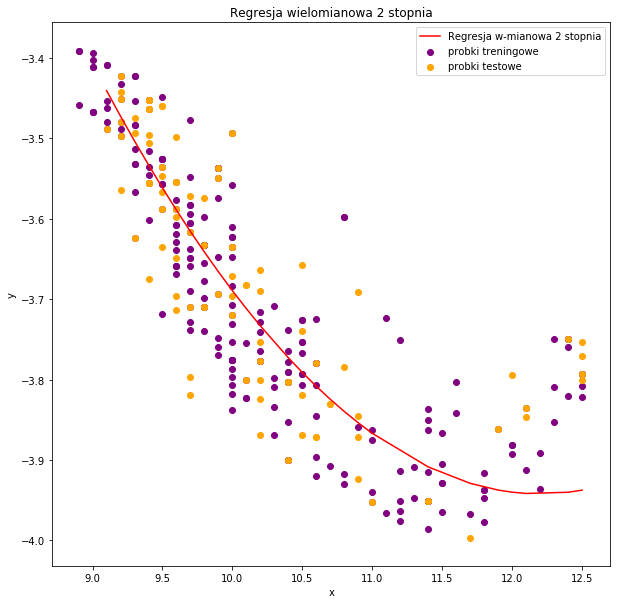

In [159]:
X_sorted_train = sorted(X_train)
Y_sorted_train = sorted(Y_train)
reverse_order_train = np.sort(Y_sorted_train)[::-1]

X_sorted_test = sorted(X_test)
Y_sorted_test = sorted(Y_test)
reverse_order_test = np.sort(Y_sorted_test)[::-1]

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_sorted_train)
poly.fit(X_sorted_train,reverse_order_train)

model = LinearRegression()
model.fit(x_poly, reverse_order_train)
y_pred2 = model.predict(poly.fit_transform(X_sorted_test))

fig = plt.figure(figsize=(10, 10))
plt.title('Regresja wielomianowa 2 stopnia')
plt.scatter(X_train,Y_train, color='purple', label='probki treningowe')
plt.scatter(X_test,Y_test, color='orange', label='probki testowe')
plt.plot(X_sorted_test, y_pred2, color="red", label='Regresja w-mianowa 2 stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [160]:
mse_test = mean_squared_error(X_test, y_pred2)
print('MSE dla zbioru treningowego = ', mse_test)

rsquare_test = r2_score(Y_test, y_pred2)
print('R^2 dla zbioru treningowego = ', rsquare_test*(-1))

MSE dla zbioru treningowego =  191.87191378994146
R^2 dla zbioru treningowego =  0.9217916994550963


# Regresja wielomianowa trzeciego stopnia

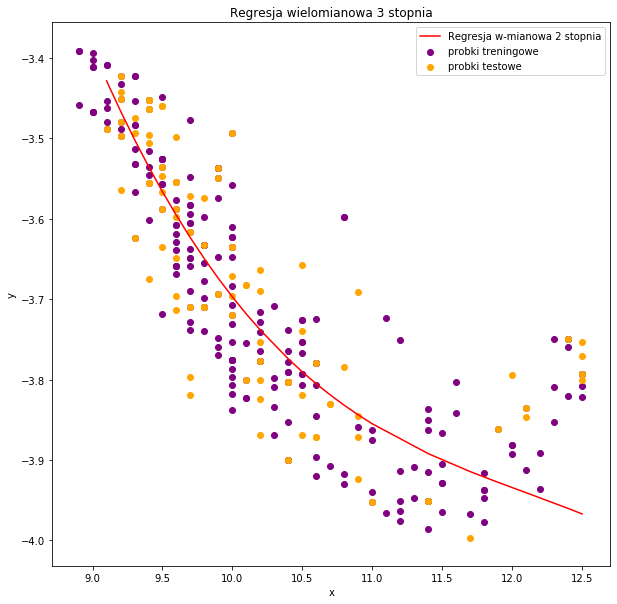

In [161]:
X_sorted_train = sorted(X_train)
Y_sorted_train = sorted(Y_train)
reverse_order_train = np.sort(Y_sorted_train)[::-1]

X_sorted_test = sorted(X_test)
Y_sorted_test = sorted(Y_test)
reverse_order_test = np.sort(Y_sorted_test)[::-1]

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_sorted_train)
poly.fit(X_sorted_train,reverse_order_train)

model = LinearRegression()
model.fit(x_poly, reverse_order_train)
y_pred3 = model.predict(poly.fit_transform(X_sorted_test))

fig = plt.figure(figsize=(10, 10))
plt.title('Regresja wielomianowa 3 stopnia')
plt.scatter(X_train,Y_train, color='purple', label='probki treningowe')
plt.scatter(X_test,Y_test, color='orange', label='probki testowe')
plt.plot(X_sorted_test, y_pred3, color="red", label='Regresja w-mianowa 2 stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [162]:
mse_test = mean_squared_error(X_test, y_pred3)
print('MSE dla zbioru treningowego = ', mse_test)

rsquare_test = r2_score(Y_test, y_pred3)
print('R^2 dla zbioru treningowego = ', rsquare_test*(-1))

MSE dla zbioru treningowego =  191.94567556126654
R^2 dla zbioru treningowego =  0.9428901109332501


# Wizualizacja wyników na wykresie

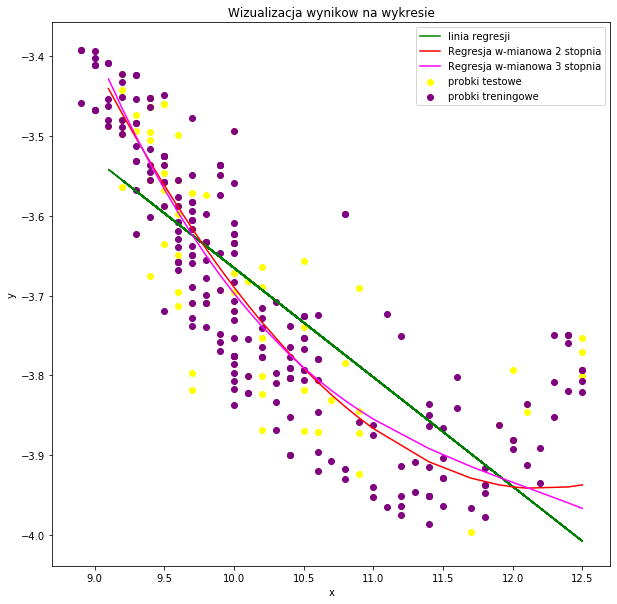

In [163]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_test,Y_test, color='yellow', label='probki testowe')
plt.scatter(X_train,Y_train, color='purple', label='probki treningowe')
plt.plot(X_test, y_pred, color='green', label='linia regresji')
plt.plot(X_sorted_test, y_pred2, color="red", label='Regresja w-mianowa 2 stopnia')
plt.plot(X_sorted_test, y_pred3, color="magenta", label='Regresja w-mianowa 3 stopnia')
plt.title('Wizualizacja wynikow na wykresie')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Zadanie 4

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [165]:
df2 = pd.read_csv('product2.csv', index_col=0)

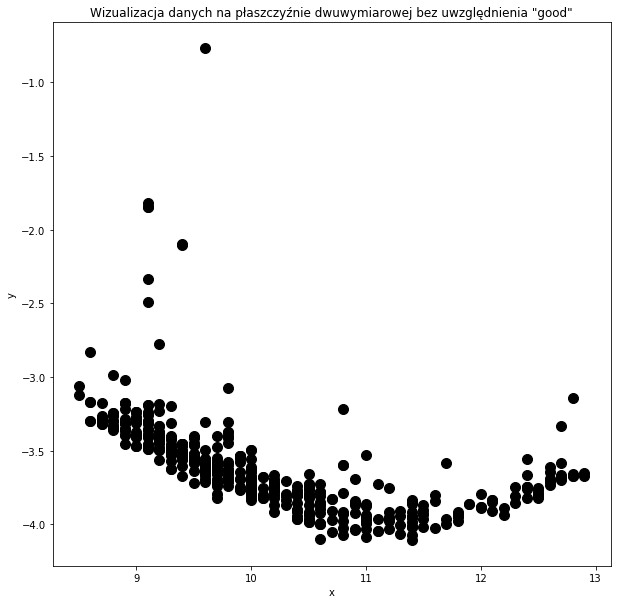

In [166]:
x1 = df2["x"]
y1 = df2["y"]
z1 = df2["good"]

fig = plt.figure(figsize=(10, 10))
plt.scatter(x1, y1, color='black', s = 100, alpha=1, edgecolor='k')
plt.title('Wizualizacja danych na płaszczyźnie dwuwymiarowej bez uwzględnienia "good"')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

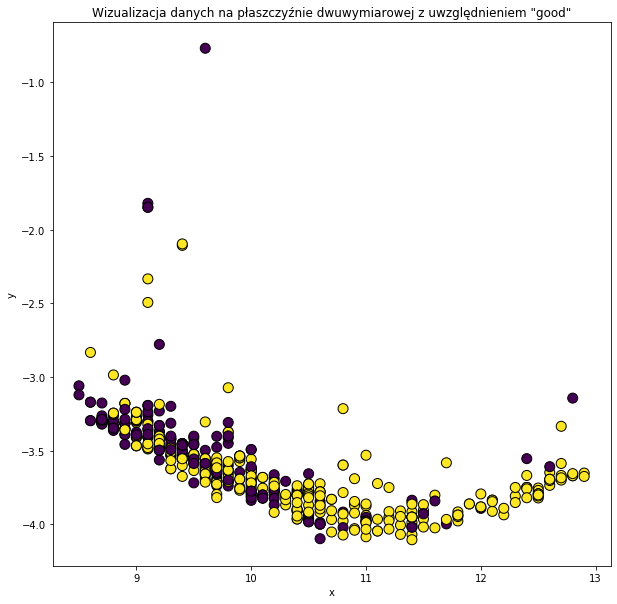

In [167]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x1, y1,
           linewidths=1, alpha=1,
           edgecolor='k',
           s = 100,
           c=z1)
plt.title('Wizualizacja danych na płaszczyźnie dwuwymiarowej z uwzględnieniem "good"')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

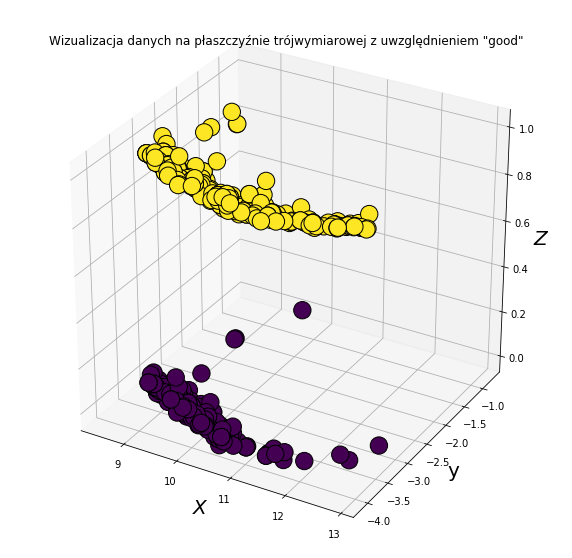

In [168]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1,
           linewidths=1, alpha=1,
           edgecolor='k',
           s = 300,
           c=z1)
plt.title('Wizualizacja danych na płaszczyźnie trójwymiarowej z uwzględnieniem "good"')
ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)
plt.ylabel('y')
plt.show()

# Regresja logistyczna uwzględniając x, y oraz good

In [169]:
variables = ['x','y']
X = df2[variables]
y = df2.good

In [170]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 1)
logreg = LogisticRegression()
logreg.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
y_pred4 = logreg.predict(X_test2)
cnf_matrix = metrics.confusion_matrix(y_test2, y_pred4)
print(cnf_matrix)

[[17 34]
 [18 81]]


Text(33.0, 0.5, 'y')

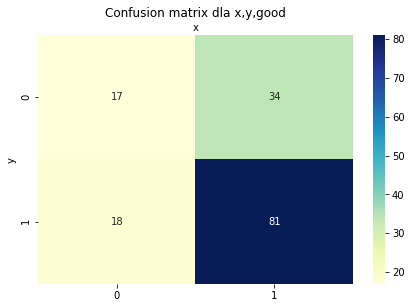

In [172]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix dla x,y,good', y=1.1)
plt.xlabel('x')
plt.ylabel('y')

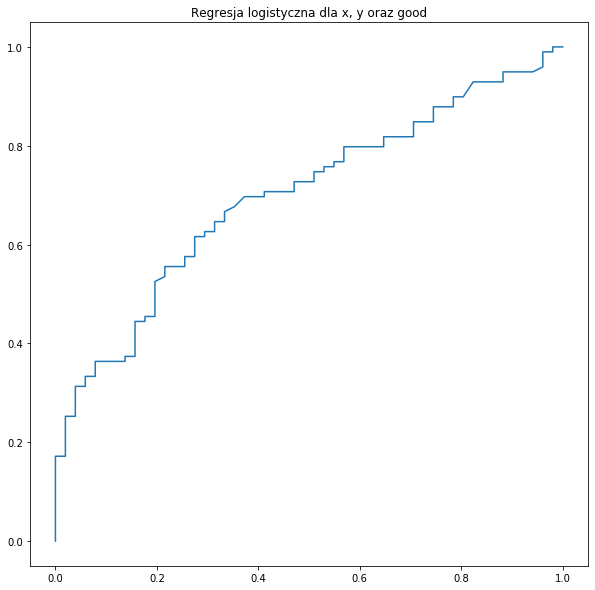

In [173]:
fig = plt.figure(figsize=(10, 10))
y_pred4 = logreg.predict_proba(X_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred4)
auc = metrics.roc_auc_score(y_test2, y_pred4)
plt.title('Regresja logistyczna dla x, y oraz good')
plt.plot(fpr,tpr)
plt.show()

# Regresja logistyczna uwzględniając x oraz good

In [174]:
X2 = df2.x
y = df2.good

X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y, test_size = 0.3, random_state=25)
logreg2 = LogisticRegression()

X_train3_reshaped = X_train3.values.reshape(-1,1)
X_test3_reshaped = X_test3.values.reshape(-1,1)
logreg2.fit(X_train3_reshaped, y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
y_pred5=logreg2.predict(X_test3_reshaped)
cnf_matrix = metrics.confusion_matrix(y_test3, y_pred5)
print(cnf_matrix)

[[25 31]
 [17 77]]


Text(33.0, 0.5, 'y')

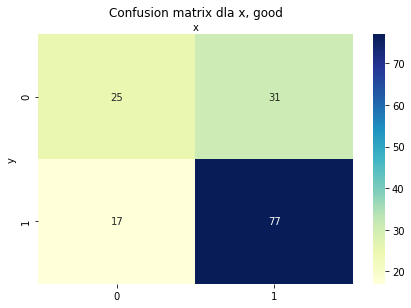

In [176]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix dla x, good', y=1.1)
plt.xlabel('x')
plt.ylabel('y')

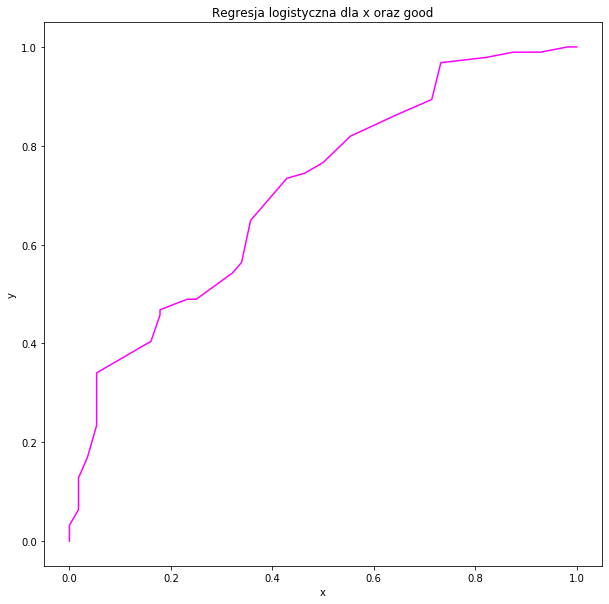

In [177]:
fig = plt.figure(figsize=(10, 10))
y_pred5 = logreg2.predict_proba(X_test3_reshaped)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test3,  y_pred5)
auc = metrics.roc_auc_score(y_test3, y_pred5)
plt.plot(fpr2, tpr2, color="magenta")
plt.title('Regresja logistyczna dla x oraz good')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Porównanie x,y,good oraz x,good

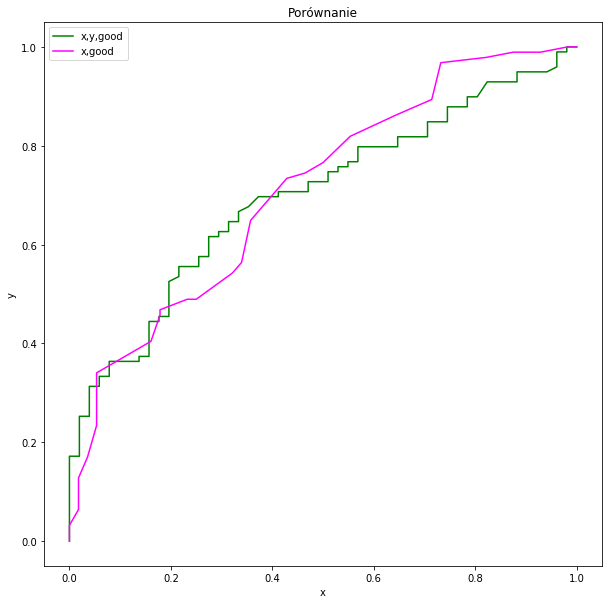

In [178]:
fig = plt.figure(figsize=(10, 10))
plt.plot(fpr,tpr, color="green", label="x,y,good")
plt.plot(fpr2, tpr2, color="magenta", label="x,good")
plt.title('Porównanie')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()